
Deliverable

Your task is to write a program that takes an input data set, applies the perceptron, and outputs the
final set of weights as well as a final confusion matrix.


In [24]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


A dataFrame is needed.

The dataFrame needs to be call 'df'

3 columns are needed: 'x1', 'x2' , 'y'


In [ ]:

##########################################################################################
############################# DataFrame ##################################################
##########################################################################################

# Assign the dataframe to the df variable below

df


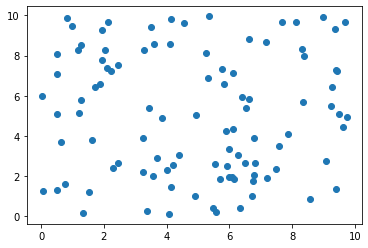

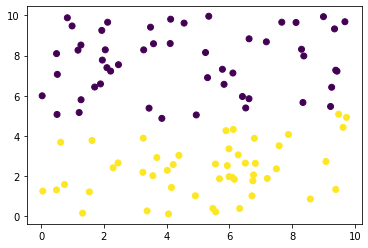

x1        x2  y
0   8.342895  5.659394 -1
1   3.439161  5.376633 -1
2   1.706290  6.430312 -1
3   6.719351  1.003873  1
4   6.158779  1.825901  1
..       ...       ... ..
95  4.943664  5.037966 -1
96  1.268499  8.526808 -1
97  5.985242  3.348484  1
98  7.176726  8.686863 -1
99  6.507643  2.636770  1

[100 rows x 3 columns]

In [41]:
#Delete this Cell. Its only for testing

#Create Random Points in R^2, between 0,0 and 10,10 
x1=10*np.random.random(100)
x2=10*np.random.random(100)
plt.scatter(x1, x2)
plt.show()

m=0.18
n=3.75

y=[]
for pos, x1_elem in enumerate(x1):
    x2_elem=x2[pos]
    res= m*x1_elem - x2_elem + n
    if(res>=0):
        y.append(1)
    else:
        y.append(-1)
        
plt.scatter(x1, x2, c=y)
plt.show()

dic={'x1': x1, 'x2': x2, 'y':y}
df=pd.DataFrame(data=dic)
df

In [36]:
#Create weights W0
w=[0,0,0] #(w1,w2,w3)

#function that implemet the perceptron
def perceptron(x1_elem,x2_elem):
    pred_1=w[0] + w[1]*x1_elem + w[2]*x2_elem
    if(pred_1>=0):
        return (1)
    else:
        return (-1)

#Compares the expected result with the prediction. 
# 0: observations correctly predicted to be +1
# 1: observations incorrectly predicted to be +1
# 2: observations incorrectly predicted to be −1
# 3: observations correctly predicted to be −1
def eval_res(y_elem, predicted_elem):
    if(y_elem==1):
        if(predicted_elem==1):
            return (0)
        else:
            return (2)
    else:
        if(predicted_elem==1):
            return (1)
        else:
            return (3)

#If the prediction is correct return a True. if is misclassified return a False
def correct(result):
    if(result==0 or result==3): # Result is 0 if The correct value is 1 and predicted is 1. Result is 3 if The correct value is 0 and predicted is 0
        return (True)
    else:
        return (False)


Main Loop of the algorithm


In [37]:

historic_Acurracy=[]

for x in range(10000):
    print ("Loop Number: " + str(x+1))

    #Execute the perceptron
    predicted = df.apply(lambda elem: perceptron(elem['x1'],elem['x2']),axis=1)
    #print(predicted)
    #Add the predicted values to the dataframe
    df["predicted"]=predicted
    #print(df)

    #Execute the evaluation and add it to the dataframe
    result = df.apply(lambda elem: eval_res(elem['y'],elem['predicted']),axis=1)
    df["result"]=result
    #print(df)

    #Count the number of each cases
    case_count=df.result.value_counts()
    #If an option does not appear we catch the exception, and we add a 0
    res=[]
    try:
        res.append(case_count.at[0])
    except KeyError:
        res.append(0)

    try:
        res.append(case_count.at[1])
    except KeyError:
        res.append(0)

    try:
        res.append(case_count.at[2])
    except KeyError:
        res.append(0)

    try:
        res.append(case_count.at[3])
    except KeyError:
        res.append(0)


    #Calculate the accuracy
    accuracy= (res[0]+res[3]) / (res[0]+res[1]+res[2]+res[3]) * 100
    
    #Print the Confusion Matrix and the Accuracy
    print(res)
    print("|----------------|-----------------------|-----------------------|")
    print("|\t\t |\t Actual +1\t |\t Actual −1\t |")
    print("|----------------|-----------------------|-----------------------|")
    print("|Predicted +1 \t |\t " +str(res[0])+ "\t\t |\t " + str(res[1])+"\t\t |")
    print("|----------------|-----------------------|-----------------------|")
    print("|Predicted -1 \t |\t " +str(res[2])+ "\t\t |\t " + str(res[3])+"\t\t |")
    print("|----------------|-----------------------|-----------------------|")
    print("")
    print("Accuracy: " + str(accuracy) + " %")
    
    historic_Acurracy.append(accuracy)
    
    #If Accuracy is 100 % we exit the loop. If not we update the Weights
    if(accuracy==100):
        break
    else:
        #Aply the function to the dataframe
        correct_col=df.apply(lambda elem: correct(elem['result']),axis=1)
        df["correct"]=correct_col
        #print(df)

        #Pick One random Observation from the misclassified observations
        incorrect_Pred=df.loc[df['correct']==False]
        random_Obs=incorrect_Pred.sample()
        #random_Obs

        #Update the Weights
        elem=random_Obs.iloc[0]
        w[0]=w[0]+1*elem['y']
        w[1]=w[1]+elem['x1']*elem['y']
        w[2]=w[2]+elem['x2']*elem['y']
        print("weights:" + str(w))

Loop Number: 1
[6, 94, 0, 0]
|----------------|-----------------------|-----------------------|
|		 |	 Actual +1	 |	 Actual −1	 |
|----------------|-----------------------|-----------------------|
|Predicted +1 	 |	 6		 |	 94		 |
|----------------|-----------------------|-----------------------|
|Predicted -1 	 |	 0		 |	 0		 |
|----------------|-----------------------|-----------------------|

Accuracy: 6.0 %
weights:[-1, -6.905473183146635, -6.047367154060776]
Loop Number: 2
[0, 0, 6, 94]
|----------------|-----------------------|-----------------------|
|		 |	 Actual +1	 |	 Actual −1	 |
|----------------|-----------------------|-----------------------|
|Predicted +1 	 |	 0		 |	 0		 |
|----------------|-----------------------|-----------------------|
|Predicted -1 	 |	 6		 |	 94		 |
|----------------|-----------------------|-----------------------|

Accuracy: 94.0 %
weights:[0, -4.180480483919606, -4.241570640173064]
Loop Number: 3
[0, 0, 6, 94]
|----------------|---------------------

We were unable to converge to a set of weights that correctly classifies the data. These data may not be linearly separable.


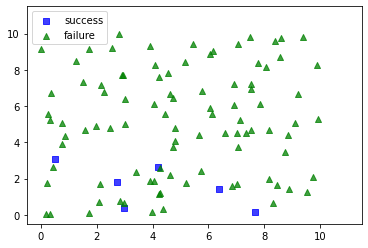

In [40]:
 #Get the number of elements
long= len(df.index)
#First let separate the success form failure, to make it easier to plot
x1_success=[]
x2_success=[]
x1_failure=[]
x2_failure=[]

for pos in range(long):
    elem=df.iloc[pos]
    if(elem['y']==1):
        x1_success.append(elem['x1'])
        x2_success.append(elem['x2'])
    else:
        x1_failure.append(elem['x1'])
        x2_failure.append(elem['x2'])

if(accuracy!=100):
    #Accuracy have not reach 100%.
    print("We were unable to converge to a set of weights that correctly classifies the data. These data may not be linearly separable.")
    success=plt.scatter(x1_success, x2_success, c="b", marker="s",label="success",alpha=0.75)
    failure=plt.scatter(x1_failure, x2_failure, c="g", marker="^",label="failure",alpha=0.75)

    plt.legend()
    plt.xlim(-0.5,11.5)
    plt.ylim(-0.5,11.5)
    plt.show()
else:
    #We print the Weights that classifies the data
    print("weights[w0,w1,w2]:" + str(w))
    print("Approximated target function: " + str(w[0]) + " + " + str(w[1]) + " * x1 + " + str(w[2]) + " * x2 = 0")
    
    #Also sow the evolution of the acurracy
    plt.plot(historic_Acurracy, label="Acurracy")
    plt.legend()
    plt.show()
    
    
    #Lets see the data frame
    #Create points to draw the line
    #Point 1: 
    p1x=0
    p1y=( - w[1]*p1x - w[0])/w[2]
    #Point 2:
    p2x=10
    p2y=( - w[1]*p2x - w[0])/w[2]

    success=plt.scatter(x1_success, x2_success, c="b", marker="s",label="success",alpha=0.75)
    failure=plt.scatter(x1_failure, x2_failure, c="g", marker="^",label="failure",alpha=0.75)
    line=plt.plot([p1x,p2x],[p1y,p2y],c="r", label="Prediction Line")

    plt.legend()
    plt.xlim(-0.5,11.5)
    plt.ylim(-0.5,11.5)
    plt.show()